In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import tensorflow as tf
import numpy as np
import gc


In [18]:
pickle_file_path = './data/test_df.pickle'

with open(pickle_file_path, 'rb') as f:
    test_df = pickle.load(f)

pickle_file_path = './data/train_df.pickle'

with open(pickle_file_path, 'rb') as f:
    train_df = pickle.load(f)
    

study_name = '413_testiyo_3'


In [19]:



mean_columns = ['X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean']


selected_features_pickle_path = './data/selected_features_list.pickle'
with open(selected_features_pickle_path, 'rb') as f:
    FEATURE_COLS = pickle.load(f)

print(FEATURE_COLS)



['WORLDCLIM_BIO1_annual_mean_temperature', 'WORLDCLIM_BIO12_annual_precipitation', 'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month', 'WORLDCLIM_BIO15_precipitation_seasonality', 'WORLDCLIM_BIO4_temperature_seasonality', 'WORLDCLIM_BIO7_temperature_annual_range', 'SOIL_bdod_100.200cm_mean_0.01_deg', 'SOIL_bdod_15.30cm_mean_0.01_deg', 'SOIL_bdod_30.60cm_mean_0.01_deg', 'SOIL_bdod_60.100cm_mean_0.01_deg', 'SOIL_phh2o_0.5cm_mean_0.01_deg', 'SOIL_phh2o_100.200cm_mean_0.01_deg', 'SOIL_phh2o_15.30cm_mean_0.01_deg', 'SOIL_phh2o_30.60cm_mean_0.01_deg', 'SOIL_phh2o_5.15cm_mean_0.01_deg', 'SOIL_phh2o_60.100cm_mean_0.01_deg', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m12', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m12'

In [20]:
def plot_data(df, columns_names):
    plt.figure(figsize=(15, 3))

    # Setting up a grid of plots with 2 columns
    n_cols = 6
    n_rows = len(columns_names) // n_cols + (len(columns_names) % n_cols > 0)

    for i, col in enumerate(columns_names):
        plt.subplot(n_rows, n_cols, i+1)
        sns.kdeplot(df[col], bw_adjust=0.5, fill=False, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel('Value')
        plt.ylabel('Density')

    plt.tight_layout()
    plt.show()
    


In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [22]:
train_df[mean_columns].describe()

,X4_mean,X11_mean,X18_mean,X50_mean,X26_mean,X3112_mean
count,49168.000000,49168.000000,49168.000000,49168.000000,49168.000000,49168.000000
mean,0.516058,15.752458,2.772597,1.592122,24.176388,1598.763010
std,0.138489,6.961194,4.549765,0.588147,72.898061,2271.015359
min,0.181879,2.836897,0.033326,0.510491,0.005874,10.527904
25%,0.408995,11.060960,0.306775,1.185120,0.544728,263.122005
50%,0.502897,15.296873,0.676143,1.471036,2.289064,694.205681
75%,0.616053,19.505972,2.962085,1.886668,12.249738,1964.239682
max,0.883987,43.206557,24.975647,3.677128,785.944393,15639.231100


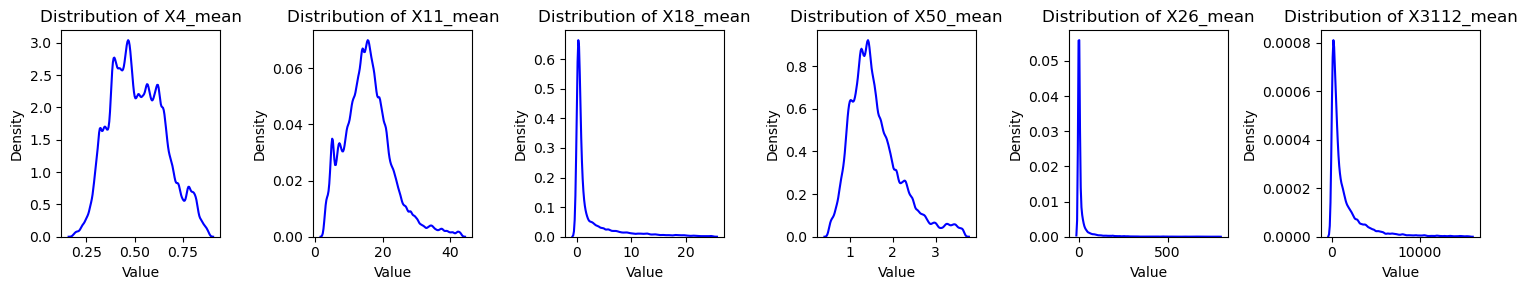

In [23]:
plot_data(train_df, mean_columns)

In [24]:
train_df[FEATURE_COLS].describe()
train_df_original = train_df.copy()

In [25]:
from sklearn.preprocessing import StandardScaler, RobustScaler

print(train_df['fold'].value_counts())

# scaler = StandardScaler() # TODO testaa robustscaler
scaler = RobustScaler()

sample_df = train_df.copy()
train_df = sample_df[sample_df.fold != 3]
valid_df = sample_df[sample_df.fold == 3]
print(f"# Num Train: {len(train_df)} | Num Valid: {len(valid_df)}")


train_df[FEATURE_COLS] = scaler.fit_transform(train_df[FEATURE_COLS].values)
valid_df[FEATURE_COLS] = scaler.transform(valid_df[FEATURE_COLS].values)

scaler_tabufeatures_name = f'./NN_search/scaler_tabufeatures_{study_name}_train.pickle'
print(f"Saving scaler to {scaler_tabufeatures_name}")
with open(f'{scaler_tabufeatures_name}', 'wb') as f:
    pickle.dump(scaler, f)




fold
0.0    9834
2.0    9834
1.0    9834
4.0    9833
3.0    9833
Name: count, dtype: int64
# Num Train: 39335 | Num Valid: 9833
Saving scaler to ./NN_search/scaler_tabufeatures_413_testiyo_3_train.pickle


/tmp/ipykernel_9111/540637523.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[FEATURE_COLS] = scaler.fit_transform(train_df[FEATURE_COLS].values)
/tmp/ipykernel_9111/540637523.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df[FEATURE_COLS] = scaler.transform(valid_df[FEATURE_COLS].values)


In [26]:
train_df[FEATURE_COLS].describe()

,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,SOIL_bdod_30.60cm_mean_0.01_deg,SOIL_bdod_60.100cm_mean_0.01_deg,SOIL_phh2o_0.5cm_mean_0.01_deg,SOIL_phh2o_100.200cm_mean_0.01_deg,SOIL_phh2o_15.30cm_mean_0.01_deg,SOIL_phh2o_30.60cm_mean_0.01_deg,SOIL_phh2o_5.15cm_mean_0.01_deg,SOIL_phh2o_60.100cm_mean_0.01_deg,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m3,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m3,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m3,VOD_C_2002_2018_multiyear_mean_m01,VOD_C_2002_2018_multiyear_mean_m02,VOD_C_2002_2018_multiyear_mean_m03,VOD_C_2002_2018_multiyear_mean_m04,VOD_C_2002_2018_multiyear_mean_m05,VOD_C_2002_2018_multiyear_mean_m06,VOD_C_2002_2018_multiyear_mean_m07,VOD_C_2002_2018_multiyear_mean_m08,VOD_C_2002_2018_multiyear_mean_m09,VOD_C_2002_2018_multiyear_mean_m10,VOD_C_2002_2018_multiyear_mean_m11,VOD_C_2002_2018_multiyear_mean_m12,VOD_Ku_1987_2017_multiyear_mean_m01,VOD_Ku_1987_2017_multiyear_mean_m02,VOD_Ku_1987_2017_multiyear_mean_m03,VOD_Ku_1987_2017_multiyear_mean_m04,VOD_Ku_1987_2017_multiyear_mean_m05,VOD_Ku_1987_2017_multiyear_mean_m06,VOD_Ku_1987_2017_multiyear_mean_m07,VOD_Ku_1987_2017_multiyear_mean_m08,VOD_Ku_1987_2017_multiyear_mean_m09,VOD_Ku_1987_2017_multiyear_mean_m10,VOD_Ku_1987_2017_multiyear_mean_m11,VOD_Ku_1987_2017_multiyear_mean_m12,VOD_X_1997_2018_multiyear_mean_m01,VOD_X_1997_2018_multiyear_mean_m02,VOD_X_1997_2018_multiyear_mean_m03,VOD_X_1997_2018_multiyear_mean_m04,VOD_X_1997_2018_multiyear_mean_m05,VOD_X_1997_2018_multiyear_mean_m06,VOD_X_1997_2018_multiyear_mean_m07,VOD_X_1997_2018_multiyear_mean_m08,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12,SOIL_nitrogen_0.5cm_mean_0.01_deg,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m4,SOIL_bdod_5.15cm_mean_0.01_deg,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m4,SOIL_sand_0.5cm_mean_0.01_deg,SOIL_sand_5.15cm_mean_0.01_deg,SOIL_silt_0.5cm_mean_0.01_deg,SOIL_silt_15.30cm_mean_0.01_deg,SOIL_silt_30.60cm_mean_0.01_deg,SOIL_silt_5.15cm_mean_0.01_deg,SOIL_soc_0.5cm_mean_0.01_deg,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m3
count,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.000000,39335.00000

In [27]:
valid_df[FEATURE_COLS].describe()

,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,SOIL_bdod_30.60cm_mean_0.01_deg,SOIL_bdod_60.100cm_mean_0.01_deg,SOIL_phh2o_0.5cm_mean_0.01_deg,SOIL_phh2o_100.200cm_mean_0.01_deg,SOIL_phh2o_15.30cm_mean_0.01_deg,SOIL_phh2o_30.60cm_mean_0.01_deg,SOIL_phh2o_5.15cm_mean_0.01_deg,SOIL_phh2o_60.100cm_mean_0.01_deg,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m3,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m3,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m3,VOD_C_2002_2018_multiyear_mean_m01,VOD_C_2002_2018_multiyear_mean_m02,VOD_C_2002_2018_multiyear_mean_m03,VOD_C_2002_2018_multiyear_mean_m04,VOD_C_2002_2018_multiyear_mean_m05,VOD_C_2002_2018_multiyear_mean_m06,VOD_C_2002_2018_multiyear_mean_m07,VOD_C_2002_2018_multiyear_mean_m08,VOD_C_2002_2018_multiyear_mean_m09,VOD_C_2002_2018_multiyear_mean_m10,VOD_C_2002_2018_multiyear_mean_m11,VOD_C_2002_2018_multiyear_mean_m12,VOD_Ku_1987_2017_multiyear_mean_m01,VOD_Ku_1987_2017_multiyear_mean_m02,VOD_Ku_1987_2017_multiyear_mean_m03,VOD_Ku_1987_2017_multiyear_mean_m04,VOD_Ku_1987_2017_multiyear_mean_m05,VOD_Ku_1987_2017_multiyear_mean_m06,VOD_Ku_1987_2017_multiyear_mean_m07,VOD_Ku_1987_2017_multiyear_mean_m08,VOD_Ku_1987_2017_multiyear_mean_m09,VOD_Ku_1987_2017_multiyear_mean_m10,VOD_Ku_1987_2017_multiyear_mean_m11,VOD_Ku_1987_2017_multiyear_mean_m12,VOD_X_1997_2018_multiyear_mean_m01,VOD_X_1997_2018_multiyear_mean_m02,VOD_X_1997_2018_multiyear_mean_m03,VOD_X_1997_2018_multiyear_mean_m04,VOD_X_1997_2018_multiyear_mean_m05,VOD_X_1997_2018_multiyear_mean_m06,VOD_X_1997_2018_multiyear_mean_m07,VOD_X_1997_2018_multiyear_mean_m08,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12,SOIL_nitrogen_0.5cm_mean_0.01_deg,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m2,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m4,SOIL_bdod_5.15cm_mean_0.01_deg,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m12,MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m4,SOIL_sand_0.5cm_mean_0.01_deg,SOIL_sand_5.15cm_mean_0.01_deg,SOIL_silt_0.5cm_mean_0.01_deg,SOIL_silt_15.30cm_mean_0.01_deg,SOIL_silt_30.60cm_mean_0.01_deg,SOIL_silt_5.15cm_mean_0.01_deg,SOIL_soc_0.5cm_mean_0.01_deg,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m3
count,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.00000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,

In [28]:
X_train_tab = train_df[FEATURE_COLS].values
X_train_feat = np.stack(train_df['features'].values)
# y_train = train_df[mean_columns].values
y_train = train_df[mean_columns]

X_valid_tab = valid_df[FEATURE_COLS].values 
X_valid_feat = np.stack(valid_df['features'].values)
# y_valid = valid_df[mean_columns].values
y_valid = valid_df[mean_columns]



In [29]:
print(X_train_tab.shape)

(39335, 81)


In [30]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from optuna.integration import TFKerasPruningCallback
# import optuna
# from keras import regularizers, layers, optimizers, initializers
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
# from datetime import timedelta
# import time
# import os
# from sklearn.preprocessing import StandardScaler, MinMaxScaler,  RobustScaler, PowerTransformer, QuantileTransformer

# # os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'



# def r2_score(y_true, y_pred):
#     ss_res = tf.reduce_sum(tf.square(y_true - y_pred), axis=0)
#     ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=0)), axis=0)
#     r2 = 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())
#     r2 = tf.where(tf.math.is_nan(r2), tf.zeros_like(r2), r2)  # Korvaa NaN-arvot nollilla
#     return tf.reduce_mean(tf.maximum(r2, 0.0))


# def huber_loss_wrapper(delta):
#     def huber_loss(y_true, y_pred):
#         return tf.keras.losses.Huber(delta=delta)(y_true, y_pred)
#     return huber_loss


# global current_delta
# def create_model(trial):

#     image_features_input = Input(shape=(X_train_feat.shape[1],), name='image_features_input')
#     tabular_data_input = Input(shape=(X_train_tab.shape[1],), name='tabular_data_input')

#     img_num_layers = trial.suggest_int('Imgage layers', 1, 2)
#     max_img_units = 2000
#     img_dense = image_features_input

#     image_init = trial.suggest_categorical(f'Img_init', choices = ['glorot_uniform', 'he_normal', 'he_uniform', 'lecun_normal', 'lecun_uniform',  'random_normal', 'random_uniform'])
#     activation_img = trial.suggest_categorical(f'Act_img', choices = ['relu', 'tanh', 'selu', 'LeakyReLU', 'swish', 'elu'])
#     drop_img = trial.suggest_float(f'Drop_img', 0.0, 0.9, step=0.1)
#     batch_norm_img = trial.suggest_categorical(f'Img_BatchN', choices = ['On', 'Off'])
#     for i in range(img_num_layers):

#         num_img_units = trial.suggest_int(f'Num_img_{i}', 128, max_img_units, log = True)
#         img_dense = Dense(num_img_units, activation=activation_img, kernel_initializer = image_init)(img_dense)
#         if batch_norm_img == 'On':
#             img_dense = layers.BatchNormalization()(img_dense)
#         img_dense = Dropout(drop_img)(img_dense)
#         max_img_units = min(max_img_units, num_img_units)


#     tab_num_layers = trial.suggest_int('Tabular layers', 1, 2)
#     max_tab_units = 1000
#     tab_dense = tabular_data_input
#     tab_init = trial.suggest_categorical(f'Tab_init', choices = ['glorot_uniform', 'he_normal', 'he_uniform', 'lecun_normal', 'lecun_uniform',  'random_normal', 'random_uniform'])
#     activation_tab = trial.suggest_categorical(f'Act_tab', choices = ['relu', 'tanh', 'selu', 'LeakyReLU', 'swish', 'elu'])
#     drop_tab = trial.suggest_float(f'Drop_tab', 0.0, 0.9, step = 0.1)
#     batch_norm_tab = trial.suggest_categorical(f'Tab_BatchN', choices = ['On', 'Off'])
#     for i in range(tab_num_layers):

#         num_tab_units = trial.suggest_int(f'Num_tab_{i}', 64, max_tab_units, log = True)
#         tab_dense = Dense(num_tab_units, activation=activation_tab, kernel_initializer = tab_init)(tab_dense)
#         if batch_norm_tab == 'On':
#             tab_dense = layers.BatchNormalization()(tab_dense)
#         tab_dense = Dropout(drop_tab)(tab_dense)

#         max_tab_units = min(max_tab_units, num_tab_units)


#     concatenated = Concatenate()([img_dense, tab_dense])
#     com_num_layers = trial.suggest_int('Concat layers', 1, 2)
#     max_com_units = 3000
#     con_init = trial.suggest_categorical(f'Con_init', choices = ['glorot_uniform', 'he_normal', 'he_uniform', 'lecun_normal', 'lecun_uniform', 'random_normal', 'random_uniform'])
#     activation_common = trial.suggest_categorical(f'Act_con',  choices = ['relu', 'tanh', 'selu', 'LeakyReLU', 'swish', 'elu'])
#     drop_common = trial.suggest_float(f'Drop_con', 0.0, 0.9, step = 0.1)
#     batch_norm_common = trial.suggest_categorical(f'Com_BatchN', ['On', 'Off'])
#     for i in range(com_num_layers):

#         num_common_units = trial.suggest_int(f'Num_con_{i}', 128, max_com_units, log = True)
#         concatenated = Dense(num_common_units, activation=activation_common, kernel_initializer = con_init)(concatenated)
#         if batch_norm_common == 'On':
#             concatenated = layers.BatchNormalization()(concatenated)
#         concatenated = Dropout(drop_common)(concatenated)

#         max_com_units = min(max_com_units, num_common_units)

#     output = Dense(6, activation='linear')(concatenated)
#     model = Model(inputs=[image_features_input, tabular_data_input], outputs=output)


#     # optimizer_options = ['adam', 'rmsprop', 'Nadam', 'adamax']
#     # optimizer_selected = trial.suggest_categorical('optimizer', optimizer_options)

#     # if optimizer_selected == 'adam':
#     #     optimizer = optimizers.Adam()
#     # elif optimizer_selected == 'rmsprop':
#     #     optimizer = optimizers.RMSprop()
#     # elif optimizer_selected == 'Nadam':
#     #     optimizer = optimizers.Nadam()
#     # else:
#     #     optimizer = optimizers.Adamax()

#     # delta = trial.suggest_float('delta', 0.0, 2.5)
#     # global current_delta
#     # current_delta = delta

#     model.compile(optimizer=optimizers.Nadam(), loss='mse', metrics=['mse','mae', r2_score])
#     # model.compile(optimizer=optimizers.Adam(), loss=huber_loss_wrapper(delta), metrics=['mse','mae', r2_score])
#     # model.compile(optimizer= optimizers.Adam(), loss='mse', metrics=['mse','mae', r2_score])
#     return model



# def objective(trial):

#     model = create_model(trial)

#     y_train_transformed = y_train.copy()
#     y_valid_transformed = y_valid.copy()


#     log_base_options = {'none': None, 'log2': 2, 'log10': 10, 'sqrt': 'sqrt', 'cbrt': 'cbrt'}
#     log_transforms = {'X11_mean': None, 'X18_mean': 2, 'X26_mean': 2, 'X50_mean': 'cbrt', 'X4_mean': 2, 'X3112_mean': 10}
#     # for target in mean_columns:        
#         # log_transforms[target] = log_base_options[log_base]
    

#     model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#             filepath=f"./NN_search/{study_name}_search_model.h5",
#             monitor='val_r2_score',
#             mode='max',
#             save_best_only=True,
#             save_weights_only=True,
#             verbose=0)


#     callbacks = [
#                  ReduceLROnPlateau('val_r2_score', patience=2, factor=0.7, mode = 'max'),
#                  TerminateOnNaN(),
#                  model_checkpoint_callback,
#                  EarlyStopping(monitor='val_r2_score', patience=8, mode='max', verbose = 1)
#                  ]

#     for target, log_base in log_transforms.items():
#         if log_base is not None and log_base != 'sqrt' and log_base != 'cbrt':
#             y_train_transformed[target] = np.log(y_train[target]) / np.log(log_base)
#             y_valid_transformed[target] = np.log(y_valid[target]) / np.log(log_base)

#         elif log_base == 'sqrt':
#             y_train_transformed[target] = np.sqrt(y_train[target])
#             y_valid_transformed[target] = np.sqrt(y_valid[target])

#         elif log_base == 'cbrt':
#             y_train_transformed[target] = np.cbrt(y_train[target])
#             y_valid_transformed[target] = np.cbrt(y_valid[target])

#         else:
#             y_train_transformed[target] = y_train[target]
#             y_valid_transformed[target] = y_valid[target]

#     scaler_base_options = {'Std': StandardScaler(), 'Minmax': MinMaxScaler(), 'None': None, 'Robust': RobustScaler(), 'Power': PowerTransformer(), 'Quantile': QuantileTransformer()}
#     scaler_transforms = {'X11_mean': PowerTransformer(), 'X18_mean': StandardScaler(), 'X26_mean':  PowerTransformer(), 'X50_mean': StandardScaler(), 'X4_mean': None, 'X3112_mean': PowerTransformer()}
    
#     for target, scaler in scaler_transforms.items():
#         if scaler is not None:
#             y_train_transformed[target] = scaler.fit_transform(y_train_transformed[target].values.reshape(-1, 1)).flatten()
#             y_valid_transformed[target] = scaler.transform(y_valid_transformed[target].values.reshape(-1, 1)).flatten()

#     # minmax_scaler = MinMaxScaler()
#     # y_train_transformed = minmax_scaler.fit_transform(y_train_transformed)
#     # y_valid_transformed = minmax_scaler.transform(y_valid_transformed)

#     history = model.fit([X_train_feat, X_train_tab], y_train_transformed, validation_data=([X_valid_feat, X_valid_tab], y_valid_transformed), batch_size=256, epochs=50, callbacks=callbacks, verbose = 0)

#     best_epoch = history.history['val_r2_score'].index(max(history.history['val_r2_score'])) + 1

#     model.load_weights(f'./NN_search/{study_name}_search_model.h5')

#     preds = model.predict([X_valid_feat, X_valid_tab], verbose = 0)
#     import warnings
#     try: 
#         warnings.filterwarnings('error')
#         preds_transformed = preds.copy()

#         for i, target in enumerate(mean_columns):
#             scaler = scaler_transforms[target]
#             if scaler is not None:
#                 preds_transformed[:, i] = scaler.inverse_transform(preds_transformed[:, i].reshape(-1, 1)).flatten()
#                 y_valid_transformed[target] = scaler.inverse_transform(y_valid_transformed[target].values.reshape(-1, 1)).flatten()

#         # preds_transformed = minmax_scaler.inverse_transform(preds_transformed)
#         # y_valid_transformed = minmax_scaler.inverse_transform(y_valid_transformed)

#         for i, target in enumerate(mean_columns):
#             log_base = log_transforms[target]
#             if log_base is not None and log_base != 'sqrt' and log_base != 'cbrt':
#                 preds_transformed[:, i] = np.power(log_base, preds_transformed[:, i])
#                 y_valid_transformed[target] = np.power(log_base, y_valid_transformed[target])
#             elif log_base == 'sqrt':   
#                 preds_transformed[:, i] = np.square(preds_transformed[:, i])
#                 y_valid_transformed[target] = np.square(y_valid_transformed[target])
#             elif log_base == 'cbrt':
#                 preds_transformed[:, i] = np.power(preds_transformed[:, i], 3)
#                 y_valid_transformed[target] = np.power(y_valid_transformed[target], 3)
        
#         r2_score_inv = r2_score(y_valid_transformed, preds_transformed)

#     except RuntimeWarning as e:
#         # Jos ylivuodon varoitus tapahtuu, logataan varoitus ja palautetaan erityinen arvo
#         print(f"Overflow detected: {e}")
#         r2_score_inv = 0.0

#     finally:
#         # Palauttaa varoitusten oletuskäsittelyn
#         warnings.filterwarnings('default')
    
#     if trial.number > 0:
#         if r2_score_inv > study.best_value:

#             print("*" * 50)
#             print(f'Old best R2 : {study.best_value:.5f}')
#             print(f'New best R2 : {r2_score_inv:.5f}')

#             r2 = r2_score(y_valid_transformed, preds_transformed)
#             mse  = tf.keras.losses.MeanSquaredError()(y_valid_transformed, preds_transformed)
#             mae = tf.keras.losses.MeanAbsoluteError()(y_valid_transformed, preds_transformed)
#             # huberloss = tf.keras.losses.Huber(delta=current_delta)(y_valid_transformed, preds_transformed)
#             print(f'Best epoch power errors R2 : {r2:.5f}, MSE : {mse:.5f}, MAE : {mae:.5f}')


#             # model.load_weights(f'./data/{study_name}_search_model.h5')

#             # preds = model.predict([X_valid_feat, X_valid_tab])
#             # preds_2 = np.square(preds)
#             # # y_valid_2 = np.square(y_valid)
#             # preds = model.predict([X_valid_feat, X_valid_tab], verbose = 0)

#             # r2 = r2_score(y_valid_transformed, preds)
#             # mse  = tf.keras.losses.MeanSquaredError()(y_valid, preds)
#             # mae = tf.keras.losses.MeanAbsoluteError()(y_valid, preds)
#             # huberloss = tf.keras.losses.Huber(delta=current_delta)(y_valid_2, preds_2)
#             # # print(f'Best epoch raw R2 : {r2:.5f}, MSE : {mse:.5f}, MAE : {mae:.5f}')
#             # print(f'Best epoch raw errors : {r2:.5f}, MSE : {mse:.5f}, MAE : {mae:.5f}, huber_loss : {huberloss:.5f}')

#             # preds_inv = scaler_minmax.inverse_transform(preds)
#             # y_valid_inv = scaler_minmax.inverse_transform(y_valid)
#             # r2 = r2_score(y_valid_inv, preds_inv)
#             # mse  = tf.keras.losses.MeanSquaredError()(y_valid_inv, preds_inv)
#             # mae = tf.keras.losses.MeanAbsoluteError()(y_valid_inv, preds_inv)
#             # huberloss = tf.keras.losses.Huber(delta=current_delta)(y_valid_2, preds_2)
#             # print(f'Best epoch minmax.inv R2 : {r2:.5f}, MSE : {mse:.5f}, MAE : {mae:.5f}')
#             # print(f'Best epoch raw R2 : {r2:.5f}, MSE : {mse:.5f}, MAE : {mae:.5f}, huber_loss : {huberloss:.5f}')

#             # preds = model.predict([X_valid_feat, X_valid_tab])
#             # r2 = r2_score(y_valid, preds)
#             # mse  = tf.keras.losses.MeanSquaredError()(y_valid, preds)
#             # mae = tf.keras.losses.MeanAbsoluteError()(y_valid, preds)
#             # huberloss = tf.keras.losses.Huber(delta=current_delta)(y_valid, preds)
#             # print(f'Best epoch raw R2 : {r2:.5f}, MSE : {mse:.5f}, MAE : {mae:.5f}, huber_loss : {huberloss:.5f}')
#             print(f'Best epoch : {best_epoch}')

#             best_filename = f'./NN_search/{study_name}_best_val_{r2_score_inv:.5f}_model.h5'
#             if os.path.exists(best_filename):
#                 os.remove(best_filename)

#             print(f'Saving model to {best_filename}')
#             model.save(best_filename)
    
#             best_log_transforms_name = f'./NN_search/{study_name}_{r2_score_inv:.5f}_best_log_transforms.pickle'
#             print(f'Saving log transforms to {best_log_transforms_name}')
#             with open(best_log_transforms_name, 'wb') as f:
#                 pickle.dump(log_transforms, f)

#             best_minmax = f'./NN_search/{study_name}_{r2_score_inv:.5f}_best_scalers.pickle'
#             print(f'Saving scalers to {best_minmax}')
#             with open(best_minmax, 'wb') as f:
#                 pickle.dump(scaler_transforms, f)

#             print("*" * 50)

#     if os.path.exists(f'./NN_search/{study_name}_search_model.h5'):
#         os.remove(f'./NN_search/{study_name}_search_model.h5')

#     tf.keras.backend.clear_session()
#     gc.collect()

#     return r2_score_inv


# study_name = '410_yota_haetuillalogjututkivaahaetpaikkoihinonmukavaelama_fold_3'
# num_random_trials = 10
# num_tpe_trial = 5
# search_time_max = 3600 * 18

# study = optuna.create_study(direction='maximize',
#                             study_name=study_name,
#                             storage=f'sqlite:///409_logpolselect.db',
#                             load_if_exists=True
#                             )

# search_time_taken = 0
# search_start = time.time()
# round = 0
# trials_done = 0

# while search_time_taken < search_time_max:

#     round_start = time.time()

#     print('-' * 50)
#     print(f'Starting study with {num_random_trials} random trials, round {round}')
#     print(f'Search time so far taken : {timedelta(seconds=search_time_taken)}')
#     print('-' * 50)
#     study.sampler = optuna.samplers.QMCSampler(warn_independent_sampling = False)
#     study.optimize(objective, n_trials=num_random_trials)
#     print(f'Time taken for random trials: {timedelta(seconds= (time.time() - round_start))}')
#     print(f'Starting TPE {num_tpe_trial} trials...')
#     study.sampler = optuna.samplers.TPESampler(n_startup_trials=0, multivariate=True, warn_independent_sampling = False)
#     study.optimize(objective, n_trials=num_tpe_trial)
#     print(f'Time taken for one trial this round: {timedelta(seconds= (time.time() - round_start) / (num_random_trials + num_tpe_trial))}')
#     print(f'Time this round: {timedelta(seconds= time.time() - round_start)}')

#     print('-' * 50)
#     trials_done += num_random_trials + num_tpe_trial
#     print(f'Trials done so far: {trials_done}')
#     search_time_taken = time.time() - search_start
#     print(f'Time taken for one trials all rounds: {timedelta(seconds= search_time_taken / trials_done)}')
#     round += 1

# print(f'Search time total : {timedelta(seconds=time.time() - search_start)}')






In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from optuna.integration import TFKerasPruningCallback
import optuna
from keras import regularizers, layers, optimizers, initializers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from datetime import timedelta
import time
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from __future__ import annotations

from typing import NamedTuple

from optuna.logging import get_logger
from optuna.samplers._base import _CONSTRAINTS_KEY
from optuna.study import Study
from optuna.trial import FrozenTrial
from optuna.trial import TrialState
from optuna.visualization._plotly_imports import _imports

if _imports.is_successful():
    from optuna.visualization._plotly_imports import go

_logger = get_logger(__name__)


class _TrialInfo(NamedTuple):
    trial_number: int
    sorted_intermediate_values: list[tuple[int, float]]
    feasible: bool


class _IntermediatePlotInfo(NamedTuple):
    trial_infos: list[_TrialInfo]


def _get_intermediate_plot_info(study: Study, n_last_trials: int = None) -> _IntermediatePlotInfo:
    trials = study.get_trials(
        deepcopy=False, states=(TrialState.PRUNED, TrialState.COMPLETE, TrialState.RUNNING)
    )

    if n_last_trials is not None:
        trials = trials[-n_last_trials:]  # Take only the last n_last_trials trials

    def _satisfies_constraints(trial: FrozenTrial) -> bool:
        constraints = trial.system_attrs.get(_CONSTRAINTS_KEY)
        return constraints is None or all([x <= 0.0 for x in constraints])

    trial_infos = [
        _TrialInfo(
            trial.number, sorted(trial.intermediate_values.items()), _satisfies_constraints(trial)
        )
        for trial in trials
        if len(trial.intermediate_values) > 0
    ]

    if len(trials) == 0:
        _logger.warning("Study instance does not contain trials.")
    elif len(trial_infos) == 0:
        _logger.warning(
            "You need to set up the pruning feature to utilize `plot_intermediate_values()`"
        )

    return _IntermediatePlotInfo(trial_infos)


def plot_intermediate_values(study: Study, n_last_trials: int = None) -> "go.Figure":
    """
    Plot intermediate values of the last n trials in a study.
    Args:
        study: A :class:`~optuna.study.Study` object whose trials are plotted for their intermediate
            values.
        n_last_trials: The number of last trials to include in the plot. If None, include all trials.
    Returns:
        A :class:`plotly.graph_objects.Figure` object.
    """

    _imports.check()
    return _get_intermediate_plot(_get_intermediate_plot_info(study, n_last_trials))


def _get_intermediate_plot(info: _IntermediatePlotInfo) -> "go.Figure":
    layout = go.Layout(
        title="Intermediate Values Plot",
        xaxis={"title": "Step"},
        yaxis={"title": "Intermediate Value"},
        showlegend=False,
    )

    trial_infos = info.trial_infos

    if len(trial_infos) == 0:
        return go.Figure(data=[], layout=layout)

    default_marker = {"maxdisplayed": 10}

    traces = [
        go.Scatter(
            x=tuple((x for x, _ in tinfo.sorted_intermediate_values)),
            y=tuple((y for _, y in tinfo.sorted_intermediate_values)),
            mode="lines+markers",
            marker=(
                default_marker
                if tinfo.feasible
                else {**default_marker, "color": "#CCCCCC"}  # type: ignore[dict-item]
            ),
            name="Trial{}".format(tinfo.trial_number),
        )
        for tinfo in trial_infos
    ]

    return go.Figure(data=traces, layout=layout)



np.seterr(over='ignore')

def r2_score_safe(y_true, y_pred):
    # Turvallinen R2 laskenta, joka palauttaa -inf, jos laskennassa ilmenee virheitä
    try:
        return r2_score(y_true, y_pred)
    except Exception as e: 
        print(f'Error in r2_score_safe: {e}')        
        return float('-inf')

def mean_squared_error_safe(y_true, y_pred):
    # Turvallinen MSE laskenta, joka palauttaa inf, jos laskennassa ilmenee virheitä
    try:
        return mean_squared_error(y_true, y_pred)
    except Exception as e:
        print(f'Error in mean_squared_error_safe: {e}')
        return float('-inf')

def mean_absolute_error_safe(y_true, y_pred):
    # Turvallinen MAE laskenta, joka palauttaa inf, jos laskennassa ilmenee virheitä
    try:
        return mean_absolute_error(y_true, y_pred)
    except Exception as e:
        print(f'Erros in mean_absolute_error_safe: {e}')
        return float('-inf')

def r2_score_tf(y_true, y_pred):

    try: 
        ss_res = tf.reduce_sum(tf.square(y_true - y_pred), axis=0)
        ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=0)), axis=0)
        r2 = 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())
        r2 = tf.where(tf.math.is_nan(r2), tf.zeros_like(r2), r2)  # Korvaa NaN-arvot nollilla
        return tf.reduce_mean(tf.maximum(r2, 0.0))
    except Exception as e:
        print(f'Error in r2_score_tf: {e}')
        return float('-inf')
    
def print_pareto_front(study):
    pareto_front_trials = study.best_trials
    print("Pareto front:")
    for trial in pareto_front_trials:
        print(f"Trial#{trial.number}, Values: {trial.values}")


def create_model(trial):

    image_features_input = Input(shape=(X_train_feat.shape[1],), name='image_features_input')
    tabular_data_input = Input(shape=(X_train_tab.shape[1],), name='tabular_data_input')

    num_img_units = 1477
    img_dense = Dense(num_img_units, activation='elu', kernel_initializer = 'glorot_uniform')(image_features_input)
    img_dense = layers.BatchNormalization()(img_dense)
    img_dense = Dropout(0.7)(img_dense)
    
    tab_dense = Dense(402, activation='selu', kernel_initializer = 'random_normal')(tabular_data_input)
    tab_dense = Dropout(0.6)(tab_dense)

    concatenated = Concatenate()([img_dense, tab_dense])
    
    
    concatenated = Dense(910, activation='swish', kernel_initializer = 'he_uniform')(concatenated)
    concatenated = layers.BatchNormalization()(concatenated)
    concatenated = Dropout(0.3)(concatenated)

    concatenated = Dense(793, activation='swish', kernel_initializer = 'he_uniform')(concatenated)
    concatenated = layers.BatchNormalization()(concatenated)
    concatenated = Dropout(0.3)(concatenated)

    output = Dense(6, activation='linear')(concatenated)
    model = Model(inputs=[image_features_input, tabular_data_input], outputs=output)


    optimizer_options = ['adam', 'rmsprop', 'Nadam', 'adamax']
    optimizer_selected = trial.suggest_categorical('optimizer', optimizer_options)

    if optimizer_selected == 'adam':
        optimizer = optimizers.Adam()
    elif optimizer_selected == 'rmsprop':
        optimizer = optimizers.RMSprop()
    elif optimizer_selected == 'Nadam':
        optimizer = optimizers.Nadam()
    else:
        optimizer = optimizers.Adamax()

    # delta = trial.suggest_float('delta', 0.0, 2.5)
    # global current_delta
    # current_delta = delta

    model.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae', r2_score_tf])
    # model.compile(optimizer=optimizers.Nadam(), loss='mse', metrics=['mse','mae', r2_score])
    
    
    return model

 

def objective(trial):

    model = create_model(trial)

    y_train_transformed = y_train.copy()
    y_valid_transformed = y_valid.copy()


    log_base_options = {'none': None, 'log2': 2, 'log10': 10, 'log5': 5, 'log15': 15, 'sqrt': 'sqrt', 'cbrt': 'cbrt'}
    log_transforms = {}
    for target in mean_columns:
        log_base = trial.suggest_categorical(f'Log_{target}', list(log_base_options.keys()))
        log_transforms[target] = log_base_options[log_base]

    # log_transforms = {'X11_mean': None, 'X18_mean': 2, 'X26_mean': 2, 'X50_mean': 'cbrt', 'X4_mean': 2, 'X3112_mean': 10}



    callbacks = [
                 ReduceLROnPlateau('val_r2_score_tf', patience=2, factor=0.7, mode = 'max', verbose = 0)]

    for target, log_base in log_transforms.items():
        if log_base is not None and log_base != 'sqrt' and log_base != 'cbrt':
            y_train_transformed[target] = np.log(y_train[target]) / np.log(log_base)
            y_valid_transformed[target] = np.log(y_valid[target]) / np.log(log_base)

        elif log_base == 'sqrt':
            y_train_transformed[target] = np.sqrt(y_train[target])
            y_valid_transformed[target] = np.sqrt(y_valid[target])

        elif log_base == 'cbrt':
            y_train_transformed[target] = np.cbrt(y_train[target])
            y_valid_transformed[target] = np.cbrt(y_valid[target])

        else:
            y_train_transformed[target] = y_train[target]
            y_valid_transformed[target] = y_valid[target]
    
    scaler_base_options = {'Std': StandardScaler(), 'None': None, 'minmax': MinMaxScaler(), 'Robust': RobustScaler(), 'Power': PowerTransformer(), 'Quantile': QuantileTransformer()}
    scaler_transforms = {}
    for target in mean_columns:
        scaler_base = trial.suggest_categorical(f'Scaler_{target}', list(scaler_base_options.keys()))
        scaler_transforms[target] = scaler_base_options[scaler_base]

    for target, scaler in scaler_transforms.items():
        if scaler is not None:
            y_train_transformed[target] = scaler.fit_transform(y_train_transformed[target].values.reshape(-1, 1)).flatten()
            y_valid_transformed[target] = scaler.transform(y_valid_transformed[target].values.reshape(-1, 1)).flatten()
    
    for epoch in range(17):

        model.fit([X_train_feat, X_train_tab], y_train_transformed, validation_data=([X_valid_feat, X_valid_tab], y_valid_transformed), batch_size=256, epochs=3, callbacks=callbacks, verbose = 0)
        preds_transformed = model.predict([X_valid_feat, X_valid_tab], verbose = 0)        

    
        try:        
            for i, target in enumerate(mean_columns):
                scaler = scaler_transforms[target]
                if scaler is not None:
                    preds_transformed[:, i] = scaler.inverse_transform(preds_transformed[:, i].reshape(-1, 1)).flatten()                

            for i, target in enumerate(mean_columns):
                log_base = log_transforms[target]
                if log_base is not None and log_base != 'sqrt' and log_base != 'cbrt':
                    preds_transformed[:, i] = np.power(log_base, preds_transformed[:, i])                
                elif log_base == 'sqrt':   
                    preds_transformed[:, i] = np.square(preds_transformed[:, i])    
                elif log_base == 'cbrt':
                    preds_transformed[:, i] = np.power(preds_transformed[:, i], 3)

            r2_score_inv = r2_score_safe(y_valid, preds_transformed)                        

        except Exception as e:
            print(f'Error in inverse transformation: {e}')
            print(f'Trial number {trial.number} epoch {epoch*3}')
            r2_score_inv = float('-inf')
            
        if np.isnan(preds_transformed).any():
            print(f'Nan values in predictions')
            print(f'Trial number {trial.number} epoch {epoch*3}')
            r2_score_inv = float('-inf')                        

        if np.isinf(preds_transformed).any():
            print(f'Inf values in predictions')
            print(f'Trial number {trial.number} epoch {epoch*3}')
            r2_score_inv = float('-inf')

        

        trial.report(r2_score_inv, epoch)
        new_best_found = False
        new_best = None

        if trial.should_prune():

            print(f'Trial {trial.number} pruned at epoch {epoch} with R2 {r2_score_inv:.5f}')

            if trial.number > 0:
                if r2_score_inv > study.best_value:

                    print("*" * 50)
                    print(f'Old best R2 : {study.best_value:.5f}')
                    print(f'New best R2 : {r2_score_inv:.5f}')

                    r2 = r2_score_safe(y_valid, preds_transformed)
                    mse  = mean_squared_error(y_valid, preds_transformed)
                    mae = mean_absolute_error(y_valid, preds_transformed)
                    
                    print(f'Best epoch all errors R2 : {r2:.5f}, MSE : {mse:.5f}, MAE : {mae:.5f}')
                    print(f'Best epoch : {epoch}')

                    best_filename = f'./NN_search/{study_name}_best_val_{r2_score_inv:.5f}_model.h5'
                    if os.path.exists(best_filename):
                        os.remove(best_filename)

                    print(f'Saving model to {best_filename}')
                    model.save(best_filename)
            
                    best_log_transforms_name = f'./NN_search/{study_name}_{r2_score_inv:.5f}_best_log_transforms.pickle'
                    print(f'Saving log transforms to {best_log_transforms_name}')
                    with open(best_log_transforms_name, 'wb') as f:
                        pickle.dump(log_transforms, f, protocol=pickle.HIGHEST_PROTOCOL)

                    scaler_transforms_name = f'./NN_search/{study_name}_{r2_score_inv:.5f}_best_scalers.pickle'
                    print(f'Saving scalers to {scaler_transforms_name}')
                    with open(scaler_transforms_name, 'wb') as f:
                        pickle.dump(scaler_transforms, f, protocol=pickle.HIGHEST_PROTOCOL)

                    print("*" * 50)
                
            tf.keras.backend.clear_session()
            gc.collect()
                
            raise optuna.exceptions.TrialPruned()
        
        if trial.number > 0 and not new_best_found:
            if r2_score_inv > study.best_value:
                new_best_found = True
                new_best = r2_score_inv


                print("*" * 50)
                print(f'Old best R2 : {study.best_value:.5f}')
                print(f'New best R2 : {r2_score_inv:.5f}')

                r2 = r2_score_safe(y_valid, preds_transformed)
                mse  = mean_squared_error(y_valid, preds_transformed)
                mae = mean_absolute_error(y_valid, preds_transformed)
                
                print(f'Best epoch all errors R2 : {r2:.5f}, MSE : {mse:.5f}, MAE : {mae:.5f}')
                print(f'Best epoch : {epoch}')

                best_filename = f'./NN_search/{study_name}_best_val_{r2_score_inv:.5f}_model.h5'
                if os.path.exists(best_filename):
                    os.remove(best_filename)

                print(f'Saving model to {best_filename}')
                model.save(best_filename)
        
                best_log_transforms_name = f'./NN_search/{study_name}_{r2_score_inv:.5f}_best_log_transforms.pickle'
                print(f'Saving log transforms to {best_log_transforms_name}')
                with open(best_log_transforms_name, 'wb') as f:
                    pickle.dump(log_transforms, f, protocol=pickle.HIGHEST_PROTOCOL)

                scaler_transforms_name = f'./NN_search/{study_name}_{r2_score_inv:.5f}_best_scalers.pickle'
                print(f'Saving scalers to {scaler_transforms_name}')
                with open(scaler_transforms_name, 'wb') as f:
                    pickle.dump(scaler_transforms, f, protocol=pickle.HIGHEST_PROTOCOL)

                print("*" * 50)

    
        if new_best is None:
            new_best = r2_score_inv
        elif r2_score_inv > new_best:
            new_best = r2_score_inv
                
        if new_best_found:
            if r2_score_inv > study.best_value:
                
                print("*" * 50)
                print(f'Getting better R2 : {r2_score_inv:.5f} with a new best in this run :) ' )
                print(f'Old best R2 : {study.best_value:.5f}')
                print(f'New best R2 : {r2_score_inv:.5f}')

                r2 = r2_score_safe(y_valid, preds_transformed)
                mse  = mean_squared_error(y_valid, preds_transformed)
                mae = mean_absolute_error(y_valid, preds_transformed)
                
                print(f'Best epoch all errors R2 : {r2:.5f}, MSE : {mse:.5f}, MAE : {mae:.5f}')
                print(f'Best epoch : {epoch}')

                best_filename = f'./NN_search/{study_name}_best_val_{r2_score_inv:.5f}_model.h5'
                if os.path.exists(best_filename):
                    os.remove(best_filename)

                print(f'Saving model to {best_filename}')
                model.save(best_filename)
        
                best_log_transforms_name = f'./NN_search/{study_name}_{r2_score_inv:.5f}_best_log_transforms.pickle'
                print(f'Saving log transforms to {best_log_transforms_name}')
                with open(best_log_transforms_name, 'wb') as f:
                    pickle.dump(log_transforms, f, protocol=pickle.HIGHEST_PROTOCOL)

                scaler_transforms_name = f'./NN_search/{study_name}_{r2_score_inv:.5f}_best_scalers.pickle'
                print(f'Saving scalers to {scaler_transforms_name}')
                with open(scaler_transforms_name, 'wb') as f:
                    pickle.dump(scaler_transforms, f, protocol=pickle.HIGHEST_PROTOCOL)



            
            
        
    if os.path.exists(f'./NN_search/{study_name}_search_model.h5'):
        os.remove(f'./NN_search/{study_name}_search_model.h5')

    tf.keras.backend.clear_session()
    gc.collect()
    
    return new_best


num_random_trials = 1
num_gene = 20
num_tpe_trial = 5


search_time_max = 3600 * 18

study = optuna.create_study(direction='maximize',
                            study_name=study_name,
                            storage=f'sqlite:///413_prunerilla.db',
                            load_if_exists=True,
                            pruner=optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=1, interval_steps=3)
                            )

search_time_taken = 0
search_start = time.time()
round = 0
trials_done = 0
genemachine = optuna.samplers.NSGAIIISampler()
qmcampler = optuna.samplers.QMCSampler(warn_independent_sampling = False)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=0, multivariate=True, warn_independent_sampling = False, n_ei_candidates=42)



import logging

logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

optuna.logging.get_logger("optuna").setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO)


while search_time_taken < search_time_max:

    round_start = time.time()

    print('-' * 50)
    print(f'Starting study with {num_random_trials} random trials, round {round}')
    print(f'Search time so far taken : {timedelta(seconds=search_time_taken)}')
    print('-' * 50)
    study.sampler = qmcampler
    study.optimize(objective, n_trials=num_random_trials)
    print(f'Time taken for random trials: {timedelta(seconds= (time.time() - round_start))}')
    print(f'Time for one random trial: {timedelta(seconds= (time.time() - round_start) / num_random_trials)}')
    fig = plot_intermediate_values(study, num_random_trials)
    fig.show()

    genetime = time.time()
    print(f'Starting gene {num_gene} trials...')
    study.sampler = genemachine
    study.optimize(objective, n_trials=num_gene)
    print(f'Time taken for gene trials: {timedelta(seconds= time.time() - genetime)}')
    print(f'Time for one gene trial: {timedelta(seconds= (time.time() - genetime) / num_gene)}')
    fig = plot_intermediate_values(study, num_gene)
    fig.show()

    time_tpe = time.time() 
    print(f'Starting TPE {num_tpe_trial} trials...')
    study.sampler = tpe_sampler
    study.optimize(objective, n_trials=num_tpe_trial)
    print(f'Time taken for TPE trials: {timedelta(seconds= time.time() - time_tpe)}')
    print(f'Time for one TPE trial: {timedelta(seconds= (time.time() - time_tpe) / num_tpe_trial)}')
    fig = plot_intermediate_values(study, num_gene)
    fig.show()
    
    print(f'Time taken for one trial this round: {timedelta(seconds= (time.time() - round_start) / (num_random_trials + num_tpe_trial + num_gene))}')
    print(f'Time this round: {timedelta(seconds= time.time() - round_start)}')
    fig = plot_intermediate_values(study, num_random_trials + num_tpe_trial + num_gene)
    fig.show()

    print('-' * 50)
    trials_done += num_random_trials + num_tpe_trial + num_gene
    print(f'Trials done so far: {trials_done}')
    search_time_taken = time.time() - search_start
    print(f'Time taken for one trials all rounds: {timedelta(seconds= search_time_taken / trials_done)}')
    round += 1

print(f'Search time total : {timedelta(seconds=time.time() - search_start)}')



        


[I 2024-04-14 03:14:43,304] Using an existing study with name '413_testiyo_3' instead of creating a new one.
/tmp/ipykernel_9111/3829321696.py:460: ExperimentalWarning:

NSGAIIISampler is experimental (supported from v3.2.0). The interface can change in the future.

/tmp/ipykernel_9111/3829321696.py:461: ExperimentalWarning:

QMCSampler is experimental (supported from v3.0.0). The interface can change in the future.

/home/tobias/miniconda3/envs/tf/lib/python3.9/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.



--------------------------------------------------
Starting study with 1 random trials, round 0
Search time so far taken : 0:00:00
--------------------------------------------------
Trial 521 pruned at epoch 1 with R2 -474.41703


[I 2024-04-14 03:15:04,212] Trial 521 pruned. 


Time taken for random trials: 0:00:20.902796
Time for one random trial: 0:00:20.902915


Starting gene 2 trials...
Trial 522 pruned at epoch 1 with R2 -32020081647825252.00000


[I 2024-04-14 03:15:25,681] Trial 522 pruned. 


Error in r2_score_safe: Input contains infinity or a value too large for dtype('float32').
Inf values in predictions
Trial number 523 epoch 0
Error in r2_score_safe: Input contains infinity or a value too large for dtype('float32').
Inf values in predictions
Trial number 523 epoch 3
Trial 523 pruned at epoch 1 with R2 -inf


[I 2024-04-14 03:15:46,895] Trial 523 pruned. 


Time taken for gene trials: 0:00:42.669218
Time for one gene trial: 0:00:21.334665


Starting TPE 2 trials...
Trial 524 pruned at epoch 1 with R2 0.13478


[I 2024-04-14 03:16:10,976] Trial 524 pruned. 


Trial 525 pruned at epoch 1 with R2 -65345482.70915


[I 2024-04-14 03:16:35,511] Trial 525 pruned. 


Time taken for TPE trials: 0:00:48.602356
Time for one TPE trial: 0:00:24.301209
Pareto front:
Trial#430, Values: [0.28553583718368597]
Time taken for one trial this round: 0:00:22.456839
Time this round: 0:01:52.284214
--------------------------------------------------
Trials done so far: 5
Time taken for one trials all rounds: 0:00:22.457110
--------------------------------------------------
Starting study with 1 random trials, round 1
Search time so far taken : 0:01:52.285550
--------------------------------------------------
Error in r2_score_safe: Input contains infinity or a value too large for dtype('float32').
Inf values in predictions
Trial number 526 epoch 0
Error in r2_score_safe: Input contains infinity or a value too large for dtype('float32').
Inf values in predictions
Trial number 526 epoch 3
Trial 526 pruned at epoch 1 with R2 -inf


[I 2024-04-14 03:16:59,883] Trial 526 pruned. 


Time taken for random trials: 0:00:24.288849
Time for one random trial: 0:00:24.288904


Starting gene 2 trials...
Error in r2_score_safe: Input contains infinity or a value too large for dtype('float32').
Inf values in predictions
Trial number 527 epoch 0
Error in r2_score_safe: Input contains infinity or a value too large for dtype('float32').
Inf values in predictions
Trial number 527 epoch 3
Trial 527 pruned at epoch 1 with R2 -inf


[I 2024-04-14 03:17:20,240] Trial 527 pruned. 


Trial 528 pruned at epoch 1 with R2 -15230.79370


[I 2024-04-14 03:17:41,287] Trial 528 pruned. 


Time taken for gene trials: 0:00:41.391602
Time for one gene trial: 0:00:20.695826


Starting TPE 2 trials...


[W 2024-04-14 03:18:05,475] Trial 529 failed with parameters: {'optimizer': 'rmsprop', 'Log_X4_mean': 'none', 'Log_X11_mean': 'log10', 'Log_X18_mean': 'sqrt', 'Log_X50_mean': 'cbrt', 'Log_X26_mean': 'log2', 'Log_X3112_mean': 'log5', 'Scaler_X4_mean': 'minmax', 'Scaler_X11_mean': 'Std', 'Scaler_X18_mean': 'None', 'Scaler_X50_mean': 'Std', 'Scaler_X26_mean': 'Robust', 'Scaler_X3112_mean': 'Robust'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/tobias/miniconda3/envs/tf/lib/python3.9/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_9111/3829321696.py", line 270, in objective
    model.fit([X_train_feat, X_train_tab], y_train_transformed, validation_data=([X_valid_feat, X_valid_tab], y_valid_transformed), batch_size=256, epochs=3, callbacks=callbacks, verbose = 0)
  File "/home/tobias/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py"

KeyboardInterrupt: 

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
# from tensorflow.keras.models import Model
# from optuna.integration import TFKerasPruningCallback
# import optuna
# from keras import regularizers, layers, optimizers, initializers
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
# from datetime import timedelta
# import time
# import os
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer, RobustScaler
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# def r2_score_safe(y_true, y_pred):
#     # Turvallinen R2 laskenta, joka palauttaa -inf, jos laskennassa ilmenee virheitä
#     try:
#         return r2_score(y_true, y_pred)
#     except Exception as e: 
#         print(f'Error in r2_score_safe: {e}')
#         return float('-inf')

# def mean_squared_error_safe(y_true, y_pred):
#     # Turvallinen MSE laskenta, joka palauttaa inf, jos laskennassa ilmenee virheitä
#     try:
#         return mean_squared_error(y_true, y_pred)
#     except Exception as e:
#         print(f'Error in mean_squared_error_safe: {e}')
#         return float('inf')

# def mean_absolute_error_safe(y_true, y_pred):
#     # Turvallinen MAE laskenta, joka palauttaa inf, jos laskennassa ilmenee virheitä
#     try:
#         return mean_absolute_error(y_true, y_pred)
#     except Exception as e:
#         print(f'Erros in mean_absolute_error_safe: {e}')
#         return float('inf')

# def r2_score_tf(y_true, y_pred):

#     try: 
#         ss_res = tf.reduce_sum(tf.square(y_true - y_pred), axis=0)
#         ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=0)), axis=0)
#         r2 = 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())
#         r2 = tf.where(tf.math.is_nan(r2), tf.zeros_like(r2), r2)  # Korvaa NaN-arvot nollilla
#         return tf.reduce_mean(tf.maximum(r2, 0.0))
#     except Exception as e:
#         print(f'Error in r2_score_tf: {e}')
#         return float('-inf')


# def create_model(trial):

#     image_features_input = Input(shape=(X_train_feat.shape[1],), name='image_features_input')
#     tabular_data_input = Input(shape=(X_train_tab.shape[1],), name='tabular_data_input')

#     num_img_units = 1477
#     img_dense = Dense(num_img_units, activation='elu', kernel_initializer = 'glorot_uniform')(image_features_input)
#     img_dense = layers.BatchNormalization()(img_dense)
#     img_dense = Dropout(0.7)(img_dense)
    
#     tab_dense = Dense(402, activation='selu', kernel_initializer = 'random_normal')(tabular_data_input)
#     tab_dense = Dropout(0.6)(tab_dense)

#     concatenated = Concatenate()([img_dense, tab_dense])
    
    
#     concatenated = Dense(910, activation='swish', kernel_initializer = 'he_uniform')(concatenated)
#     concatenated = layers.BatchNormalization()(concatenated)
#     concatenated = Dropout(0.3)(concatenated)

#     concatenated = Dense(793, activation='swish', kernel_initializer = 'he_uniform')(concatenated)
#     concatenated = layers.BatchNormalization()(concatenated)
#     concatenated = Dropout(0.3)(concatenated)

#     output = Dense(6, activation='linear')(concatenated)
#     model = Model(inputs=[image_features_input, tabular_data_input], outputs=output)


#     optimizer_options = ['adam', 'rmsprop', 'Nadam', 'adamax']
#     optimizer_selected = trial.suggest_categorical('optimizer', optimizer_options)

#     if optimizer_selected == 'adam':
#         optimizer = optimizers.Adam()
#     elif optimizer_selected == 'rmsprop':
#         optimizer = optimizers.RMSprop()
#     elif optimizer_selected == 'Nadam':
#         optimizer = optimizers.Nadam()
#     else:
#         optimizer = optimizers.Adamax()

#     model.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae', r2_score_tf])
#     # model.compile(optimizer=optimizers.Nadam(), loss='mse', metrics=['mse','mae', r2_score])
    
    
#     return model

 

# def objective(trial):

#     model = create_model(trial)

#     y_train_transformed = y_train.copy()
#     y_valid_transformed = y_valid.copy()


#     log_base_options = {'none': None, 'log2': 2, 'log10': 10, 'log5': 5, 'log15': 15, 'sqrt': 'sqrt', 'cbrt': 'cbrt'}
#     log_transforms = {}
#     for target in mean_columns:
#         log_base = trial.suggest_categorical(f'Log_{target}', list(log_base_options.keys()))
#         log_transforms[target] = log_base_options[log_base]

#     # log_transforms = {'X11_mean': None, 'X18_mean': 2, 'X26_mean': 2, 'X50_mean': 'cbrt', 'X4_mean': 2, 'X3112_mean': 10}

#     model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#             filepath=f"./NN_search/{study_name}_search_model.h5",
#             monitor='val_r2_score_tf',
#             mode='max',
#             save_best_only=True,
#             save_weights_only=True,
#             verbose=0)


#     callbacks = [
#                  ReduceLROnPlateau('val_r2_score_tf', patience=2, factor=0.5, mode = 'max', verbose = 1),
#                  TerminateOnNaN(),
#                  model_checkpoint_callback,
#                  EarlyStopping(monitor='val_r2_score_tf', patience=3, mode='max', verbose = 1)
#                  ]

#     for target, log_base in log_transforms.items():
#         if log_base is not None and log_base != 'sqrt' and log_base != 'cbrt':
#             y_train_transformed[target] = np.log(y_train[target]) / np.log(log_base)
#             y_valid_transformed[target] = np.log(y_valid[target]) / np.log(log_base)

#         elif log_base == 'sqrt':
#             y_train_transformed[target] = np.sqrt(y_train[target])
#             y_valid_transformed[target] = np.sqrt(y_valid[target])

#         elif log_base == 'cbrt':
#             y_train_transformed[target] = np.cbrt(y_train[target])
#             y_valid_transformed[target] = np.cbrt(y_valid[target])

#         else:
#             y_train_transformed[target] = y_train[target]
#             y_valid_transformed[target] = y_valid[target]
    
#     scaler_base_options = {'Std': StandardScaler(), 'None': None, 'minmax': MinMaxScaler(), 'Robust': RobustScaler(), 'Power': PowerTransformer(), 'Quantile': QuantileTransformer()}
#     scaler_transforms = {}
#     for target in mean_columns:
#         scaler_base = trial.suggest_categorical(f'Scaler_{target}', list(scaler_base_options.keys()))
#         scaler_transforms[target] = scaler_base_options[scaler_base]

#     for target, scaler in scaler_transforms.items():
#         if scaler is not None:
#             y_train_transformed[target] = scaler.fit_transform(y_train_transformed[target].values.reshape(-1, 1)).flatten()
#             y_valid_transformed[target] = scaler.transform(y_valid_transformed[target].values.reshape(-1, 1)).flatten()
    
    
#     history = model.fit([X_train_feat, X_train_tab], y_train_transformed, validation_data=([X_valid_feat, X_valid_tab], y_valid_transformed), batch_size=256, epochs=50, callbacks=callbacks, verbose = 0)
#     best_epoch = history.history['val_r2_score_tf'].index(max(history.history['val_r2_score_tf'])) + 1

#     model.load_weights(f'./NN_search/{study_name}_search_model.h5')

#     preds_transformed = model.predict([X_valid_feat, X_valid_tab], verbose = 0)        

#     r2_score_inv = float('-inf')

#     try:        
#         for i, target in enumerate(mean_columns):
#             scaler = scaler_transforms[target]
#             if scaler is not None:
#                 preds_transformed[:, i] = scaler.inverse_transform(preds_transformed[:, i].reshape(-1, 1)).flatten()                

#         for i, target in enumerate(mean_columns):
#             log_base = log_transforms[target]
#             if log_base is not None and log_base != 'sqrt' and log_base != 'cbrt':
#                 preds_transformed[:, i] = np.power(log_base, preds_transformed[:, i])                
#             elif log_base == 'sqrt':   
#                 preds_transformed[:, i] = np.square(preds_transformed[:, i])    
#             elif log_base == 'cbrt':
#                 preds_transformed[:, i] = np.power(preds_transformed[:, i], 3)

#     except Exception as e:
#         print(f'Error in inverse transformation: {e}')
#         r2_score_inv = float('-inf')
    
#     if np.isnan(preds_transformed).any():
#         r2_score_inv = float('-inf')                        

#     if np.isinf(preds_transformed).any():
#         r2_score_inv = float('-inf')

#     if r2_score_inv != float('-inf'):
#         r2_score_inv = r2_score_safe(y_valid, preds_transformed)

#     if trial.number > 0:
#         if r2_score_inv > study.best_value:

#             print("*" * 50)
#             print(f'Old best R2 : {study.best_value:.5f}')
#             print(f'New best R2 : {r2_score_inv:.5f}')

#             r2 = r2_score_safe(y_valid, preds_transformed)
#             mse  = mean_squared_error(y_valid, preds_transformed)
#             mae = mean_absolute_error(y_valid, preds_transformed)
            
#             print(f'Best epoch all errors R2 : {r2:.5f}, MSE : {mse:.5f}, MAE : {mae:.5f}')
#             print(f'Best epoch : {best_epoch}')

#             best_filename = f'./NN_search/{study_name}_best_val_{r2_score_inv:.5f}_model.h5'
#             if os.path.exists(best_filename):
#                 os.remove(best_filename)

#             print(f'Saving model to {best_filename}')
#             model.save(best_filename)
    
#             best_log_transforms_name = f'./NN_search/{study_name}_{r2_score_inv:.5f}_best_log_transforms.pickle'
#             print(f'Saving log transforms to {best_log_transforms_name}')
#             with open(best_log_transforms_name, 'wb') as f:
#                 pickle.dump(log_transforms, f, protocol=pickle.HIGHEST_PROTOCOL)

#             scaler_transforms_name = f'./NN_search/{study_name}_{r2_score_inv:.5f}_best_scalers.pickle'
#             print(f'Saving scalers to {scaler_transforms_name}')
#             with open(scaler_transforms_name, 'wb') as f:
#                 pickle.dump(scaler_transforms, f, protocol=pickle.HIGHEST_PROTOCOL)

#         print("*" * 50)
        
#     tf.keras.backend.clear_session()
#     gc.collect()
        
    
#     return r2_score_inv



# num_random_trials = 10
# num_tpe_trial = 3
# search_time_max = 3600 * 18

# study = optuna.create_study(direction='maximize',
#                             study_name=study_name,
#                             storage=f'sqlite:///412_bugipois.db',
#                             load_if_exists=True,
#                             pruner=optuna.pruners.MedianPruner(n_startup_trials=3, n_warmup_steps=2, interval_steps=2)
#                             )

# search_time_taken = 0
# search_start = time.time()
# round = 0
# trials_done = 0

# while search_time_taken < search_time_max:

#     round_start = time.time()

#     print('-' * 50)
#     print(f'Starting study with {num_random_trials} random trials, round {round}')
#     print(f'Search time so far taken : {timedelta(seconds=search_time_taken)}')
#     print('-' * 50)
#     study.sampler = optuna.samplers.QMCSampler(warn_independent_sampling = False)
#     study.optimize(objective, n_trials=num_random_trials)
#     print(f'Time taken for random trials: {timedelta(seconds= (time.time() - round_start))}')
#     print(f'Starting TPE {num_tpe_trial} trials...')
#     study.sampler = optuna.samplers.TPESampler(n_startup_trials=0, multivariate=True, warn_independent_sampling = False, n_ei_candidates=42)
#     study.optimize(objective, n_trials=num_tpe_trial)
#     print(f'Time taken for one trial this round: {timedelta(seconds= (time.time() - round_start) / (num_random_trials + num_tpe_trial))}')
#     print(f'Time this round: {timedelta(seconds= time.time() - round_start)}')

#     print('-' * 50)
#     trials_done += num_random_trials + num_tpe_trial
#     print(f'Trials done so far: {trials_done}')
#     search_time_taken = time.time() - search_start
#     print(f'Time taken for one trials all rounds: {timedelta(seconds= search_time_taken / trials_done)}')
#     round += 1

# print(f'Search time total : {timedelta(seconds=time.time() - search_start)}')



        


In [ ]:
# optuna.visualization.plot_param_importances(study)

In [ ]:
# optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# optuna.visualization.plot_slice(study)


In [ ]:


def r2_score_tf(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred), axis=0)
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=0)), axis=0)
    r2 = 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())
    r2 = tf.where(tf.math.is_nan(r2), tf.zeros_like(r2), r2)  # Korvaa NaN-arvot nollilla
    return tf.reduce_mean(tf.maximum(r2, 0.0))

custom_objects = {"r2_score_tf": r2_score_tf}


with open(f'./NN_search/scaler_tabufeatures_{study_name}_train.pickle', 'rb') as f:
    scaler_tabular = pickle.load(f)


print(f'Tabu features scaler: {scaler}')

best_trial = study.best_value

best_model_name = f'./NN_search/{study_name}_best_val_{best_trial:.5f}_model.h5'

best_model = tf.keras.models.load_model(f'{best_model_name}', custom_objects=custom_objects)

test_df_copy = test_df.copy()

test_df_copy[FEATURE_COLS] = scaler_tabular.transform(test_df_copy[FEATURE_COLS].values)

submission_df = test_df_copy[['id']].copy()

X_test_tab = test_df_copy[FEATURE_COLS].values
X_test_feat = np.stack(test_df_copy['features'].values) 

tf.keras.backend.clear_session()
gc.collect()

predictions = best_model.predict([X_test_feat, X_test_tab])

best_log_transforms_name = f'./NN_search/{study_name}_{best_trial:.5f}_best_log_transforms.pickle'
print(f'Opening log transforms from {best_log_transforms_name}')
with open(best_log_transforms_name, 'rb') as f:
    log_transforms = pickle.load(f)

best_scalers_name = f'./NN_search/{study_name}_{best_trial:.5f}_best_scalers.pickle'
print(f'Opening scalers from {best_scalers_name}')
with open(best_scalers_name, 'rb') as f:
    scaler_transforms = pickle.load(f)

# for target, scaler in scaler_transforms.items():
#     print(f'Target {target} scaler {scaler}')
#     if scaler is not None:
#         if isinstance(scaler, StandardScaler):
#             print("  Mean:", scaler.mean_)
#             print("  Scale:", scaler.scale_)
#         elif isinstance(scaler, MinMaxScaler):
#             print("  Data min:", scaler.data_min_)
#             print("  Data max:", scaler.data_max_)
#             print("  Data range:", scaler.data_range_)
        

print(log_transforms)
print(scaler_transforms)

for i, target in enumerate(mean_columns):
    print(f'Scaler transforming target : {target} with scaler : {scaler_transforms[target]}')
    scaler = scaler_transforms[target]
    if scaler is not None:
        predictions[:, i] = scaler.inverse_transform(predictions[:, i].reshape(-1, 1)).flatten()


for i, target in enumerate(mean_columns):
    print(f'Logpot transforming target: : {target}, log transform : {log_transforms[target]}')
    log_base = log_transforms[target]
    if log_base is not None and log_base != 'sqrt' and log_base != 'cbrt':
        predictions[:, i] = np.power(log_base, predictions[:, i])
    elif log_base == 'sqrt':
        predictions[:, i] = np.square(predictions[:, i])
    elif log_base == 'cbrt':
        predictions[:, i] = np.power(predictions[:, i], 3)





In [ ]:

target_columns = ['X4', 'X11', 'X18', 'X50', 'X26', 'X3112']

submission_df[target_columns] = predictions


In [ ]:
results_training_name = './data/results_training.pickle'

if os.path.exists(results_training_name):
    results_training = pd.read_pickle(results_training_name)
else:
    columns = ['Train R2', 'Train MSE', 'Train MAE', 'Valid R2', 'Valid MSE', 'Valid MAE', 'Train preds Desc', 'Valid preds Desc', 'Test preds Desc' , 'Original data Desc' 'Kaggle R2', 'Scalers', 'Log/Pot transforms', 'NN Search space', 'Tabular scaler']
    results_training = pd.DataFrame(columns = columns)
    results_training.index.name = 'Study name'

if study_name not in results_training.index:    
    results_training.loc[study_name] = [None]*len(results_training.columns)


test_preds_desc = submission_df[target_columns].describe().to_json()
results_training.at[study_name, 'Test preds Desc'] = test_preds_desc 

original_data_desc = train_df_original[mean_columns].describe().to_json()
results_training.at[study_name, 'Original data Desc'] = original_data_desc


In [ ]:
print(f'{str(log_transforms.items())}')
print(f'{str(scaler_transforms.items())}')
print(f'{str(scaler_tabular)}')

results_training.at[study_name, 'Scalers'] = f'{scaler_transforms}'
results_training.at[study_name, 'Log/Pot transforms'] = f'{str(log_transforms.items())}'
results_training.at[study_name, 'Tabular scaler'] = f'{scaler_tabular}'


In [ ]:
## JÄRKEVYYSKOKEILU TESTATAAN train dataan

import numpy as np
import tensorflow as tf
import optuna
from keras import regularizers, layers, optimizers, initializers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from datetime import timedelta
import time
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## TEST DATA TEST

tf.keras.backend.clear_session()
gc.collect()

train_pred = best_model.predict([X_train_feat, X_train_tab])

for i, target in enumerate(mean_columns):
    print(f'Scaler transforming target : {target} with scaler : {scaler_transforms[target]}')
    scaler = scaler_transforms[target]
    if scaler is not None:
        train_pred[:, i] = scaler.inverse_transform(train_pred[:, i].reshape(-1, 1)).flatten()


for i, target in enumerate(mean_columns):
    print(f'Logpot transforming target : {target}, log transform : {log_transforms[target]}')
    log_base = log_transforms[target]
    if log_base is not None and log_base != 'sqrt' and log_base != 'cbrt':
        train_pred[:, i] = np.power(log_base, train_pred[:, i])
    elif log_base == 'sqrt':
        train_pred[:, i] = np.square(train_pred[:, i])
    elif log_base == 'cbrt':
        train_pred[:, i] = np.power(train_pred[:, i], 3)

R2_train = r2_score(y_train, train_pred)
MSE_train = mean_squared_error(y_train, train_pred)
MAE_train = mean_absolute_error(y_train, train_pred)

print(f'Train scores:\nR2 : {R2_train:.5f}, MSE : {MSE_train:.5f}, MAE : {MAE_train:.5f}')

results_training.at[study_name, 'Train R2'] = R2_train
results_training.at[study_name, 'Train MSE'] = MSE_train
results_training.at[study_name, 'Train MAE'] = MAE_train

trainining_preds_desc = pd.DataFrame(train_pred, columns = mean_columns).describe().to_json()
results_training.at[study_name, 'Train preds Desc'] = trainining_preds_desc


In [ ]:

## VALIDATION DATA TEST

tf.keras.backend.clear_session()
gc.collect()

valid_pred = best_model.predict([X_valid_feat, X_valid_tab])

for i, target in enumerate(mean_columns):
    print(f'Scaler transforming target : {target} with scaler : {scaler_transforms[target]}')
    scaler = scaler_transforms[target]
    if scaler is not None:
        valid_pred[:, i] = scaler.inverse_transform(valid_pred[:, i].reshape(-1, 1)).flatten()


for i, target in enumerate(mean_columns):
    log_base = log_transforms[target]
    if log_base is not None and log_base != 'sqrt' and log_base != 'cbrt':
        valid_pred[:, i] = np.power(log_base, valid_pred[:, i])
    elif log_base == 'sqrt':
        valid_pred[:, i] = np.square(valid_pred[:, i])
    elif log_base == 'cbrt':
        valid_pred[:, i] = np.power(valid_pred[:, i], 3)

R2_valid = r2_score(y_valid, valid_pred)
MSE_valid = mean_squared_error(y_valid, valid_pred)
MAE_valid = mean_absolute_error(y_valid, valid_pred)

print(f'Valid scores:\nR2 : {R2_valid:.5f}, MSE : {MSE_valid:.5f}, MAE : {MAE_valid:.5f}')

results_training.at[study_name, 'Valid R2'] = R2_valid
results_training.at[study_name, 'Valid MSE'] = MSE_valid
results_training.at[study_name, 'Valid MAE'] = MAE_valid

valid_preds_desc = pd.DataFrame(valid_pred, columns = mean_columns).describe().to_json()
results_training.at[study_name, 'Valid preds Desc'] = valid_preds_desc

In [ ]:

display(results_training.head(100))
logpot = results_training['Log/Pot transforms'].to_list()[0]


In [ ]:
submission_df.head()

In [ ]:
print(submission_df.info())

submission_df.to_csv('./data/submission.csv', index=False)

In [ ]:
# Kaggle = 0.0 
# results_training.at[study_name, 'Kaggle R2'] = Kaggle

results_training.drop('412_bugikaipoistestiviela_scalers_3', inplace=True)

for index, row in results_training.iterrows():
    print(f"Study Name: {index}")
    print(f'Kaggle R2: {row["Kaggle R2"]}')
    print(f"Train R2: {row['Train R2']}, Valid R2: {row['Valid R2']}")
    print("-" * 50)
    print("Train preds Description:")
    display(pd.read_json(row['Train preds Desc']))
    print("Valid preds Description:")
    display(pd.read_json(row['Valid preds Desc']))
    print("Test preds Description:")
    display(pd.read_json(row['Test preds Desc']))
    print("Original data Description:")
    display(pd.read_json(row['Original data Desc']))
    

In [ ]:
with open(results_training_name, 'wb') as f:
    results_training.to_pickle(f)